## Урок 3 

### Задание начального уровня

Потренируйтесь в нахождении матрицы схожести для валидационного сета

* загрузите `brand_tweets_valid.csv`
* примените объект `vectorizer`, обученный на датасете `brand_tweets.csv` (просто скопируйте этот код из урока)
* примените функцию `pairwise_distances` к полученной матрице

In [1]:
import pandas as pd
import nltk
import string
nltk.download('punkt', download_dir='.')

df = pd.read_csv('brand_tweets.csv', sep=',', encoding='utf8')
# удаляем строки, в которых отсутствует текст твита
df.drop(df[df.tweet_text.isnull()].index, inplace=True)

### YOUR CODE HERE ###
df.head(3)


[nltk_data] Downloading package punkt to ....
[nltk_data]   Unzipping tokenizers/punkt.zip.


,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion


In [2]:
stop_words = [
    'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd",
    'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers',
    'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which',
    'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been',
    'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if',
    'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between',
    'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out',
    'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why',
    'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not',
    'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', "don't", 'shold',
    "should've", 'now', 'd', 'll', 'm', 'o', 're', 've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't",
    'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't",
    'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't",
    'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"
]
def tokenize_text(raw_text: str):
    """Функция для токенизации текста
    
    :param raw_text: исходная текстовая строка
    """
    tokenized_str = nltk.word_tokenize(raw_text)
    tokens = [i.lower() for i in tokenized_str if ( i not in string.punctuation )]
    filtered_tokens = [i for i in tokens if ( i not in stop_words )]
    return filtered_tokens

In [3]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(tokenizer=tokenize_text)
document_matrix = vectorizer.fit_transform(df.tweet_text.values)
document_matrix

<3904x7312 sparse matrix of type '<class 'numpy.int64'>'
	with 46040 stored elements in Compressed Sparse Row format>

### Задание среднего уровня

Пользуясь матрицей схожести, полученной на предыдущем этапе, найдите top-5 твитов, похожих на твит валидационного сета с `id=14`.

In [4]:
from sklearn.metrics import pairwise_distances
import numpy as np

test_tweet_index = 14 
# 14
print(df.iloc[test_tweet_index].tweet_text+'\n------------------------------\n')

### YOUR CODE HERE ###

tweet_distance = 1-pairwise_distances(document_matrix, metric="cosine")
sorted_similarity = np.argsort(-tweet_distance[test_tweet_index,:])
for i in range (1,6):
  print (df.iloc[sorted_similarity[i]].tweet_text)
  print('-------------')



haha, awesomely rad iPad app by @madebymany http://bit.ly/hTdFim #hollergram #sxsw
------------------------------

RT haha, awesomely rad iPad app by @madebymany http://bit.ly/hTdFim #hollergram #sxsw (via @michaelpiliero)
-------------
Great #sxsw ipad app from @madebymany: http://tinyurl.com/4nqv92l
-------------
RT haha, awesomely rad iPad app by @mention {link} #hollergram #sxsw (via @mention
-------------
Very smart from @madebymany #hollergram iPad app for #sxsw! http://t.co/A3xvWc6 (may leave my vuvuzela at home now)
-------------
You must have this app for your iPad if you are going to #SXSW http://itunes.apple.com/us/app/holler-gram/id420666439?mt=8 #hollergram
-------------


### Задание высокого уровня.

У вас есть матрица схожести между объектами. Попробуйте решить задачу поиска дубликатов в тексте

1. Визуализируйте гистограмму значений в матрице схожести.
1. Напишите функцию на Python, которая принимает индекс твита, пороговое значение (число от $0.0$ до $1.0$ и матрицу схожести, а затем выводит все твиты, схожесть которых больше, чем пороговое значение.

**ВАРИАНТ 1**

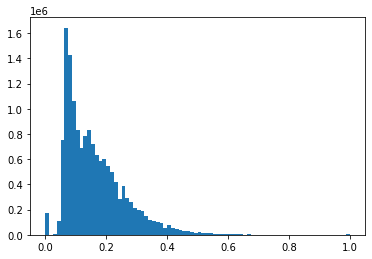

In [20]:
from matplotlib import pyplot as plt
import numpy as np
L=[]
for ind, j in enumerate(tweet_distance):
  for i in j:
    L.append(i)

plt.hist(L,bins=80)
plt.show()

**ВАРИАНТ 2**

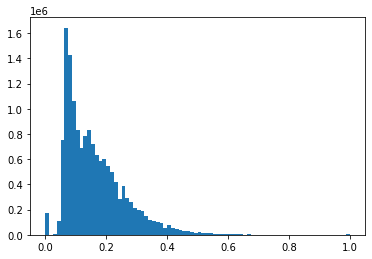

In [12]:
from matplotlib import pyplot as plt
import numpy as np
from itertools import chain

res=chain(*tweet_distance)
arr=np.array([i for i in res])
plt.hist(arr,bins=80)
plt.show()

In [ ]:
import scipy.spatial.distance

def dupl (index,n,matrix):
  arr=matrix.toarray()
  for ind, i in enumerate(arr):
    if (1-scipy.spatial.distance.cosine(arr[index],arr[ind])) >= n:
      print (df.iloc[ind].tweet_text+'\n------------------------------\n')







dupl(14,0.5,document_matrix)

Beautifully smart and simple idea RT @madebymany @thenextweb wrote about our #hollergram iPad app for #sxsw! http://bit.ly/ieaVOB
------------------------------

Great #sxsw ipad app from @madebymany: http://tinyurl.com/4nqv92l
------------------------------

haha, awesomely rad iPad app by @madebymany http://bit.ly/hTdFim #hollergram #sxsw
------------------------------

RT haha, awesomely rad iPad app by @madebymany http://bit.ly/hTdFim #hollergram #sxsw (via @michaelpiliero)
------------------------------

Very smart from @madebymany #hollergram iPad app for #sxsw! http://t.co/A3xvWc6 (may leave my vuvuzela at home now)
------------------------------

You must have this app for your iPad if you are going to #SXSW http://itunes.apple.com/us/app/holler-gram/id420666439?mt=8 #hollergram
------------------------------

RT haha, awesomely rad iPad app by @mention {link} #hollergram #sxsw (via @mention
------------------------------

RT haha, awesomely rad iPad app by @mention {link} #hol